# **Lecture5 homework: wind turbulence statistics**

Name: 张迤岚

Stuent ID: 24S054021

## **Question**

There are two sets of spatial (vertical z and transverse y) wind velocity time history records, with a duration of 10 minutes and a sampling frequency of 100 Hz (i.e., a time interval of 0.01 s). The data are stored in the windData folder.

### 1 Measurement point coordinates

(1) Z-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 0 | 0 | 0 | 0 |
| z(m) | 10 | 30 | 50 | 70 | 90 |

(2) Y-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 20 | 40 | 60 | 80 |
| z(m) | 50 | 50 | 50 | 50 | 50 |

### 2 Target turbulence characteristics
(1) Mean velocity profile
\begin{gather}
U_{avg}(z) = U_r \left(\frac{z}{z_r}\right)^\alpha \\
U_r=50\, \text{m/s},\ z_r=160\, \text{m},\ \alpha=0.22
\end{gather}

(2) Turbulence intensity profiles
\begin{gather}
I_u(z)=I_{10}\left ( \frac{z}{10}  \right )^{-\alpha}, \ I_v(z)=0.78I_u(z), \ I_w(z)=0.55I_u(z) \\
I_{10}=0.23,\alpha=0.22
\end{gather}

(3) Turbulence integral scale profiles
\begin{gather}
L_u^x(z)=100\left ( \frac{z}{30}  \right )^{0.5}, \ L_v^x(z)=0.5L_u^x(z), \ L_w^x(z)=0.5L_u^x(z) \\
\end{gather}

(4) Von Kármán wind spectra
\begin{gather}
S_u(f)=\frac{4(I_u U_{avg})^2(L_u^x/U_{avg})}{\left [ 1+70.8(fL_u^x/U_{avg})^2 \right ]^{5/6}} \\
S_v(f)=\frac{4(I_v U_{avg})^2(L_v^x/U_{avg})(1+188.4(2fL_v^x/U_{avg})^2)}{\left [ 1+70.8(2fL_v^x/U_{avg})^2 \right ]^{11/6}}  \\
S_w(f)=\frac{4(I_w U_{avg})^2(L_w^x/U_{avg})(1+188.4(2fL_w^x/U_{avg})^2)}{\left [ 1+70.8(2fL_w^x/U_{avg})^2 \right ]^{11/6}} 
\end{gather}

(5) Spatial correlation coefficient in the y-direction proposed by Shiotani  
\begin{gather}
\rho_u^y(r)=e^{-\left | r \right | /L_u^y} \\
\rho_v^y(r)=e^{-\left | r \right | /L_v^y} \\
\rho_w^y(r)=e^{-\left | r \right | /L_w^y} \\
L_u^y=60m,\ L_v^y=50m,\ L_w^y=40m
\end{gather}

### 3 Assignment requirements
Read the wind data in the `windData` folder according to the requirements below, calculate the turbulence characteristics, and plot them (the given target turbulence characteristics should be plotted together).

#### **For the z-direction wind velocity time history, calculate:**

(1) Mean velocity profile (calculate the U-component of velocity)

(2) Turbulence intensity profiles (calculate the fluctuating velocity components u, v, and w)

(3) Wind power spectral density (select one point and calculate the fluctuating velocity components u, v, and w)

(4) Probability density curve (select one point, calculate the fluctuating velocity components u, v, and w, and plot the corresponding normal distribution curve)

#### **For the y-direction wind velocity time history, calculate:**

(1) Spatial correlation coefficient in the y-direction (using the first point as the reference point, calculate the fluctuating velocity components u, v, and w)


## **Answer**

### 1 Statistical results of the z-direction wind velocity time history

In [8]:
import scipy.io as sio

# load data
simDataPath = 'D:/windEngineering/2025homework-main/Lecture5-WindTurbulenceStatistics/windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 1.1 Mean velocity profile

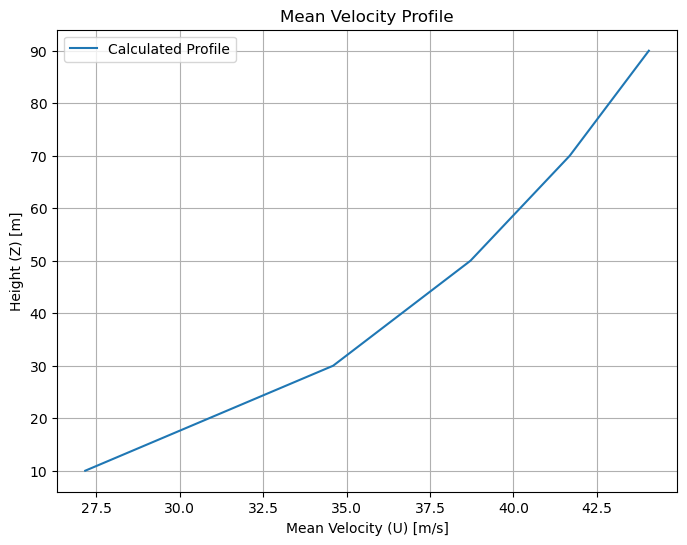

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Constants
U_r = 50  # Reference velocity in m/s
z_r = 160  # Reference height in meters
alpha = 0.22

# Mean velocity profile
def mean_velocity_profile(z):
    return U_r * (z / z_r) ** alpha

# Calculate mean velocity profile for Z data
U_avg = mean_velocity_profile(Z)

# Plot mean velocity profile
plt.figure(figsize=(8, 6))
plt.plot(U_avg, Z, label='Calculated Profile')
plt.xlabel('Mean Velocity (U) [m/s]')
plt.ylabel('Height (Z) [m]')
plt.title('Mean Velocity Profile')
plt.legend()
plt.grid(True)
plt.show()

#### 1.2 Turbulence intensity profile

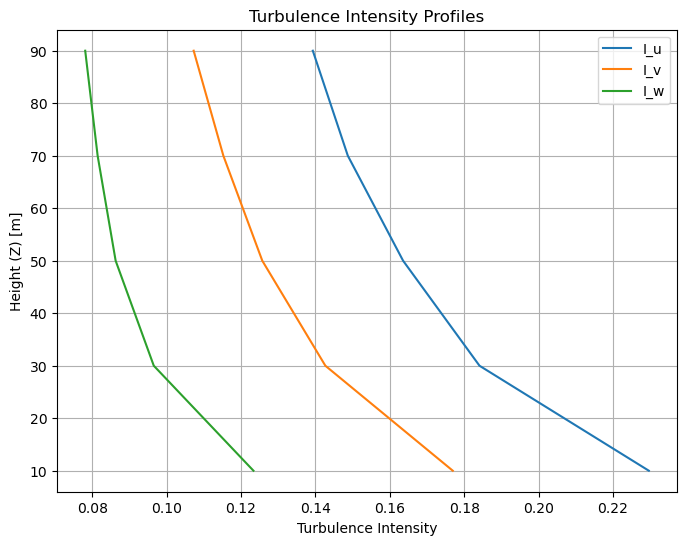

In [50]:
# Turbulence intensity profiles
def turbulence_intensity(u_component, U_avg):
    # Expand U_avg to match the shape of u_component
    U_avg_expanded = np.expand_dims(U_avg, axis=1)
    u_prime = u_component - U_avg_expanded
    return np.std(u_prime, axis=1) / U_avg

I_u = turbulence_intensity(U, U_avg)
I_v = turbulence_intensity(V, U_avg)
I_w = turbulence_intensity(W, U_avg)

# Plot turbulence intensity profiles
plt.figure(figsize=(8, 6))
plt.plot(I_u, Z, label='I_u')
plt.plot(I_v, Z, label='I_v')
plt.plot(I_w, Z, label='I_w')
plt.xlabel('Turbulence Intensity')
plt.ylabel('Height (Z) [m]')
plt.title('Turbulence Intensity Profiles')
plt.legend()
plt.grid(True)
plt.show()

#### 1.3 Wind power spectral density

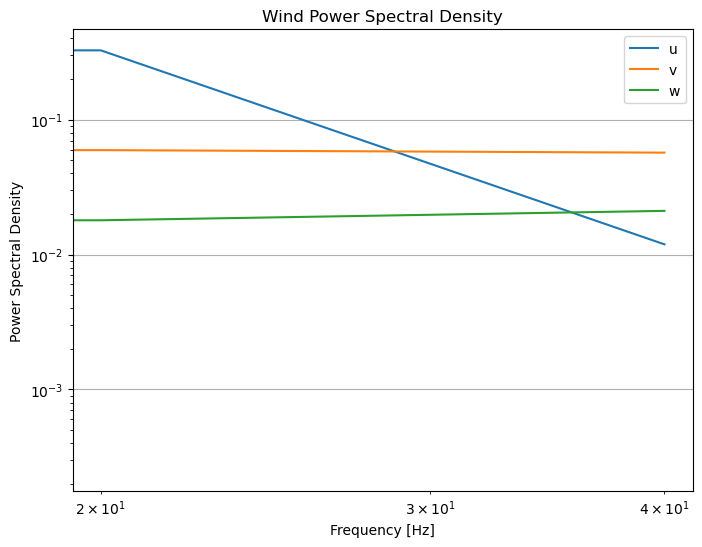

In [48]:
from scipy import signal

# Select a point (e.g., first point in the data)
point_index = 0
u_prime = U[:, point_index] - U_avg[point_index]
v_prime = V[:, point_index] - U_avg[point_index]
w_prime = W[:, point_index] - U_avg[point_index]

# Wind power spectral density
def power_spectral_density(u_prime, dt):
    f, Pxx = signal.welch(u_prime, fs=1/dt, nperseg=1024)
    return f, Pxx

f_u, Pxx_u = power_spectral_density(u_prime, dt)
f_v, Pxx_v = power_spectral_density(v_prime, dt)
f_w, Pxx_w = power_spectral_density(w_prime, dt)

# Plot wind power spectral density
plt.figure(figsize=(8, 6))
plt.loglog(f_u, Pxx_u, label='u')
plt.loglog(f_v, Pxx_v, label='v')
plt.loglog(f_w, Pxx_w, label='w')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.title('Wind Power Spectral Density')
plt.legend()
plt.grid(True)
plt.show()

#### 1.4 Probability density curve

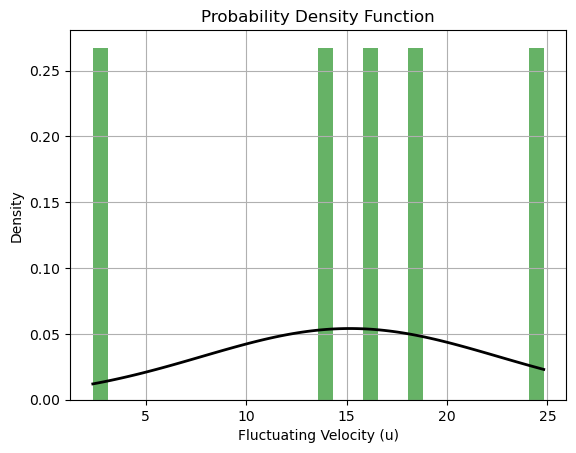

In [44]:
from scipy import stats

# Select a point (e.g., first point in the data)
point_index = 0
u_prime = U[:, point_index] - U_avg[point_index]

# Probability density curve
def plot_probability_density(u_prime):
    mu, std = stats.norm.fit(u_prime)
    x = np.linspace(min(u_prime), max(u_prime), 100)
    p = stats.norm.pdf(x, mu, std)
    plt.hist(u_prime, bins=30, density=True, alpha=0.6, color='g')
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('Probability Density Function')
    plt.xlabel('Fluctuating Velocity (u)')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

plot_probability_density(u_prime)

### 2 Statistical results of the y-direction wind velocity time history

In [54]:
# load data
simDataPath = 'D:/windEngineering/2025homework-main/Lecture5-WindTurbulenceStatistics/windData/yDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 2.1 Spatial correlation coefficient in y direction

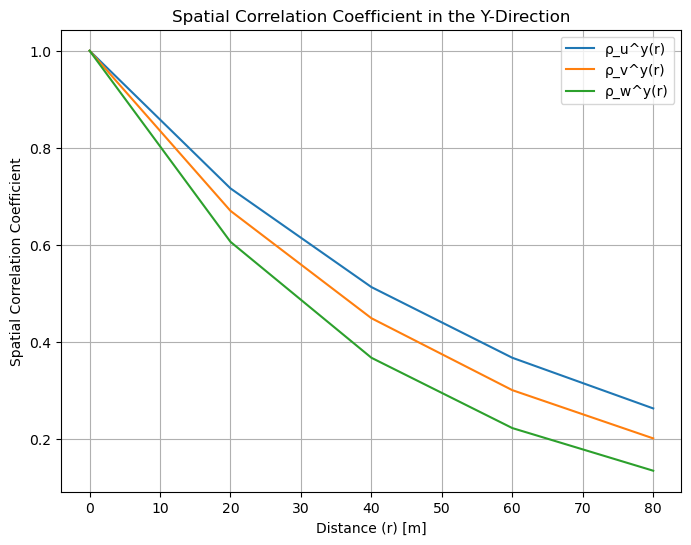

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Constants
L_u_y = 60  # Integral scale for u in y-direction
L_v_y = 50  # Integral scale for v in y-direction
L_w_y = 40  # Integral scale for w in y-direction

# Select the first point as the reference point
ref_index = 0
u_ref = U[:, ref_index]
v_ref = V[:, ref_index]
w_ref = W[:, ref_index]

# Calculate fluctuating velocity components
u_prime = U - u_ref[:, np.newaxis]
v_prime = V - v_ref[:, np.newaxis]
w_prime = W - w_ref[:, np.newaxis]

# Calculate spatial correlation coefficient
def spatial_correlation_coefficient(u_prime, r, L):
    return np.exp(-np.abs(r) / L)

# Calculate distances between the reference point and other points
r = np.abs(Y - Y[ref_index])

# Calculate spatial correlation coefficients
rho_u_y = spatial_correlation_coefficient(u_prime, r, L_u_y)
rho_v_y = spatial_correlation_coefficient(v_prime, r, L_v_y)
rho_w_y = spatial_correlation_coefficient(w_prime, r, L_w_y)

# Plot spatial correlation coefficients
plt.figure(figsize=(8, 6))
plt.plot(r, rho_u_y, label='ρ_u^y(r)')
plt.plot(r, rho_v_y, label='ρ_v^y(r)')
plt.plot(r, rho_w_y, label='ρ_w^y(r)')
plt.xlabel('Distance (r) [m]')
plt.ylabel('Spatial Correlation Coefficient')
plt.title('Spatial Correlation Coefficient in the Y-Direction')
plt.legend()
plt.grid(True)
plt.show()